# EDA for Random Forest Classification
Author: Karina Condeixa

### Content
- Checks the variables and statistics
- Visulizes the frequency of the categorical variables
- Visualizes the corralation between variable
- Checks Outliers and if the dataset is balanced
- Creates a function to do all these steps

#### Comments
- Since our dataset was randomly created, so I am not interpreting the distributions.
- The correlation between number of likes and number of views was added when I created a n_likes column based on a random percentage of the n_views column.
- Only the column n_likes presented outliers.
- The column item available is the one I am going to predict, is not unmalanced.

#### Sugestion to improve the mock dataset
Webscrape
- [website freeyourstuffberlin](https://www.free-your-stuff.com/de/berlin)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from matplotlib import pyplot as plt


In [2]:
data= pd.read_csv('data/ml_class_df.csv',index_col=None)
item_data = data

#### Features:
- item_category
- item_condition
- item_postcode
- item_available_timer in hours
- distance (item-user in meters)
- n_views
- n_likes
- item_done = y -> if the item is still available (this is what we’re trying to predict)

In [3]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [4]:
# item_data['item_postcode'] = item_data['item_postcode'].astype(str)

In [5]:
# saved_copy_item_data = item_data.copy()

In [6]:
# remove categorical data
# item_data_clean = item_data.drop('item_postcode', axis=1)


In [7]:
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,good,13129,0,14626,1513,45,yes,1
1,other,like_new,13583,20,6955,1883,338,yes,2
2,kids,poor,10629,36,29203,36,5,no,3
3,kids,like_new,13088,86,985,1573,94,no,4
4,clothes,good,12623,86,23492,1648,32,no,5


In [8]:
item_data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_postcode,5000.0,12234.7852,1236.940332,10119.0,10823.00,12355.0,13353.00,14199.0
item_available_timer,5000.0,48.6992,29.000816,0.0,23.00,48.0,74.00,99.0
distance,5000.0,15716.6744,9178.400464,15.0,7832.00,15492.0,23638.25,31988.0
n_views,5000.0,996.6536,584.483609,0.0,490.75,998.5,1511.00,2000.0
n_likes,5000.0,95.7634,86.682484,0.0,24.00,72.0,146.00,379.0
item_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0


Text(0.5, 0, 'Frequency')

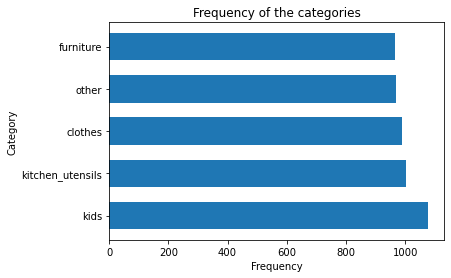

In [9]:
ax = item_data['item_category'].value_counts().plot(kind='barh', 
                                                   figsize=(6,4), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the categories")
ax.set_ylabel("Category")
ax.set_xlabel("Frequency") 

Text(0.5, 0, 'Frequency')

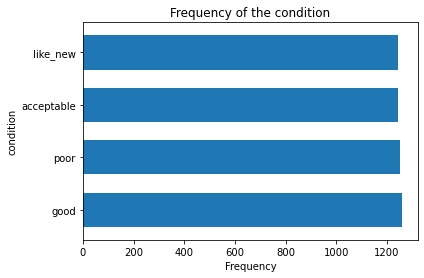

In [10]:
ax = item_data['item_condition'].value_counts().plot(kind='barh', 
                                                   figsize=(6,4), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the condition")
ax.set_ylabel("condition")
ax.set_xlabel("Frequency")

<AxesSubplot: >

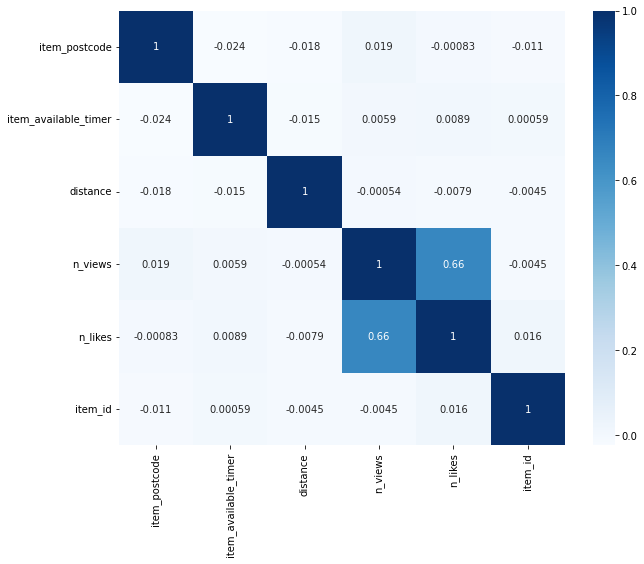

In [11]:
#correlations
corr = item_data.corr()
# corr.style.background_gradient(cmap='blues')

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, cmap="Blues", annot=True)

In [12]:
# g = sns.pairplot(item_data_clean, hue='item_done')
# g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by done_or_available", 
#                fontsize = 14, # defining the size of the title
#                y=1.05); # y = definig title y position (height)


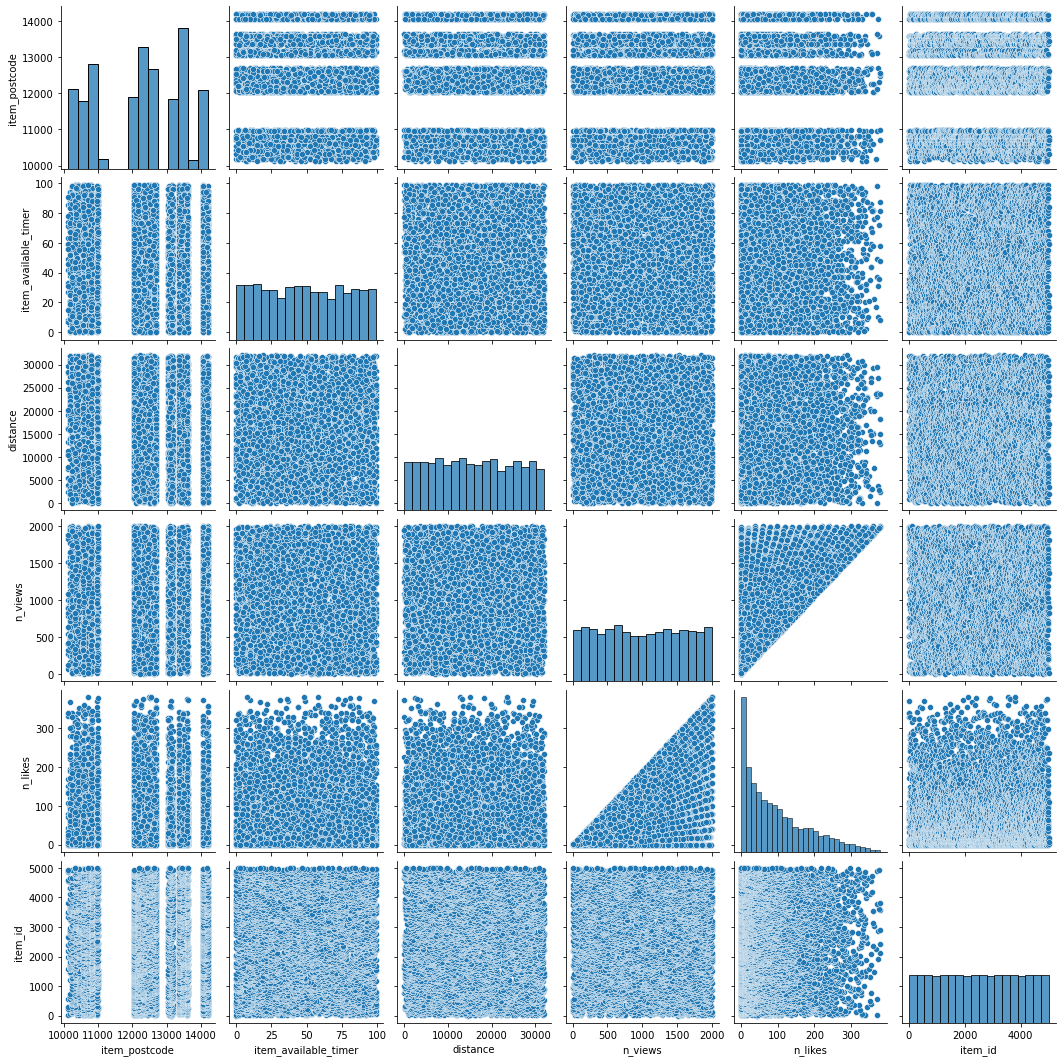

In [30]:
# hist = item_data.hist(figsize=(10,10),layout=(3,4))
# hist = item_data.hist(column = 'distance')

sns.pairplot(item_data)
plt.show()

### Outliers

<AxesSubplot: >

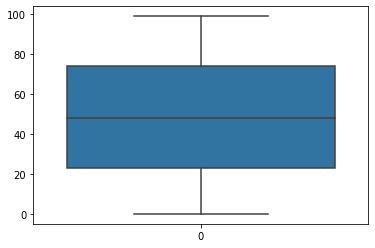

In [20]:
sns.boxplot(item_data['item_available_timer'])

<AxesSubplot: >

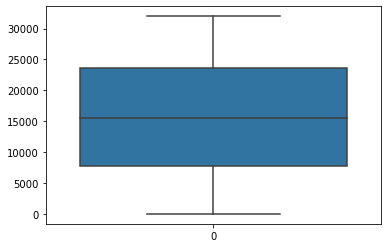

In [21]:
sns.boxplot(item_data['distance'])

<AxesSubplot: >

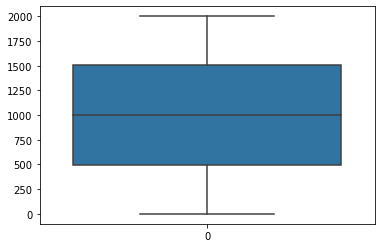

In [22]:
sns.boxplot(item_data['n_views'])

<AxesSubplot: >

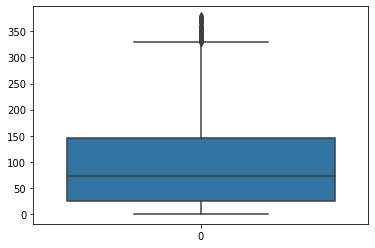

In [23]:
sns.boxplot(item_data['n_likes'])

<AxesSubplot: >

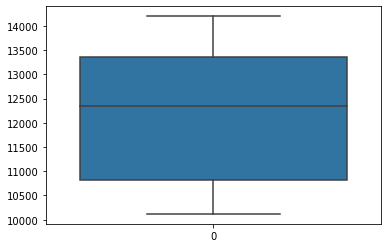

In [24]:
sns.boxplot(item_data['item_postcode'])

In [25]:
item_data.shape

(5000, 9)

In [26]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [27]:
# item_data['item_postcode'] = item_data['item_postcode'].astype('string')
# item_data.info()

In [28]:
categorical_vars = [ 'item_category', 'item_condition', 'item_postcode', 'item_available']

## Is the dataset balanced?

In [29]:
print('Total of recorded items available: ', item_data[item_data['item_available'] =='yes'].shape[0])
print('Total of recorded items not available: ', item_data[item_data['item_available'] =='no'].shape[0])

Total of recorded items available:  2560
Total of recorded items not available:  2440


In [42]:
ratio = 2560/2440
print(ratio)

1.0491803278688525
